Author: *Andy Tzanidakis*


Hello! Welcome to my very first official blog post! Please pardon my expressions and rambling, as an avid 

This tutorial aims to educate newcomers and students who are interested in learning how to use the *Gaia DR2* dataset and ways of visualizing the survey data. This tutorial already assumes that the user knows how to plot data with `matplotlib` or any package of their preference and some basic data controlling.

I'll be covering some very basics about ADQL (Astronomical Database Query Language), however, in the resouces page you should be able to find more detailed tutorials. For the take of time, I will be explaining the very `CONE_SEARCH` to visualize galaxies in our local group. 

The scope of this tutorial? Friendly introduction to querying *Gaia DR2* data, and it's always fun to visualize data in fun ways. 




#### More detailed resouces
___


In [ ]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia


import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['png']
%matplotlib inline

In [130]:
import numpy as np

from bokeh.plotting import figure, show
from bokeh.layouts import row

# normal distribution center at x=0 and y=5
x = ra
y = dec

H, xe, ye = np.histogram2d(ra, dec, bins=200)

# produce an image of the 2d histogram
p = figure(x_range=(min(xe), max(xe)), y_range=(min(ye), max(ye)), title='Image')

p.image(image=[H], x=xe[0], y=ye[0], dw=xe[-1] - xe[0], dh=ye[-1] - ye[0], palette="Turbo256")

# produce hexbin plot
p2 = figure(title="Hexbin", match_aspect=True)
p.grid.visible = False

r, bins = p2.hexbin(x, y, size=0.1, hover_color="pink", hover_alpha=0.8, palette='Turbo256')

show(row(p))

### Local Group Galaxies
___

Based on the large volume of data in Gaia DR2, generally when searching for something specific in the sky we can query our search based on any criteria the databases has. In our case, since we simply want to visualize the galaxies all we need is to restrict our search based on coordinates of these sources in the sky. 

First, we need to know exactly the coordinates of the local group galaxies in order to query the data


M31 (Andromeda): ($\alpha^{o}$, $\delta^{o}$) $\approx$ = (121.174322, -21.573311) [Andromeda Coordinates - Simbad](http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=m31&submit=SIMBAD+search)




`gaiadr2.gaia_source` where we can find gaia dr2 data

In [103]:
# Define coordinates of M31 in Galactic coordinates 
m31_l, m31_b = 120.7162630976154*u.deg, -21.1387042770371*u.deg



m31_coord = SkyCoord(l=m31_l, b=m31_b, frame='galactic') # let's make 


In [104]:
m31_coord.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (10.091885, 41.685413)>

At first glance, ADQL can be quite daunting. But bare with me for a second, and I am certain this will make sense. Here I have broken down the query search line-by-line:

Let's desipher what's going on in the query string: 

- `SELECT ra, dec, phot_g_mean_mag...`: GaiaDR2 has a large number of variables that we can query. It wouldn't be smart to download variables we know before hand we aren't going to use. Here the ADQL command is basically selecting only the paramter names we want for our final table which is the coordinates and magnitudes of the sources.


- `FROM gaiadr2.gaia_source`: gaiadr2.gaia_source is simply the table we're querying from.


- `WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra, gaiadr2.gaia_source.dec), CIRCLE('ICRS',10.6846997,41.26874756,3))=1\`: This is the beating heart of our query search. We start with the `WHERE` argument that simply means that the query **must** meet a condition. In this case our condition is `CONTAINS`.


- `WHERE CONTAINS(POINT('coordinate_frame', <gaiaDr2.variable_name:RA> dec), CIRCLE('coordinate_frame', ra, dec, radius))=1`

In [108]:
# Let's make an ADQL cone query centered around m31 coordinates with a 5 deg radius (or smaller)
query = "SELECT ra,dec, parallax, phot_g_mean_mag\
, phot_bp_mean_mag, phot_rp_mean_mag FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec), CIRCLE('ICRS',10.6846997, 41.26874756, 3))=1"


In [109]:
# It will take a bit 
my = Gaia.launch_job_async(query).get_results() # takes a couple of minutes! hang tight...

INFO: Query finished. [astroquery.utils.tap.core]


In [115]:
ra, dec = my['ra'], my['dec']

ValueError: `bins[0]` must be positive, when an integer

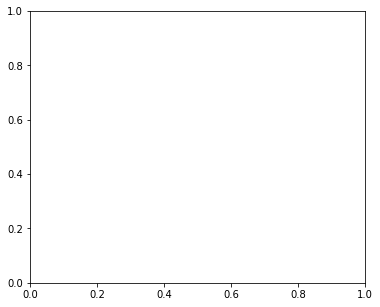

In [114]:
plt.figure(figsize=(6,5))
plt.hist2d(my['ra'], my['dec'], cmap='bone', bins=0)
plt.colorbar()
plt.scatter(10.67, 40.86, color='yellow')

plt.tight_layout()



In [178]:
from scipy import stats
import numpy as np

In [234]:
hist = stats.binned_statistic_2d((my['ra']),
                                 (my['dec']),
                                 ,
                                 bins=150, statistic='median')

In [212]:
df = my["phot_bp_mean_mag"]-my["phot_rp_mean_mag"]

In [247]:
h = np.histogram2d(my['ra'], my['dec'], bins=850)

In [248]:
df = np.array(df)

/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


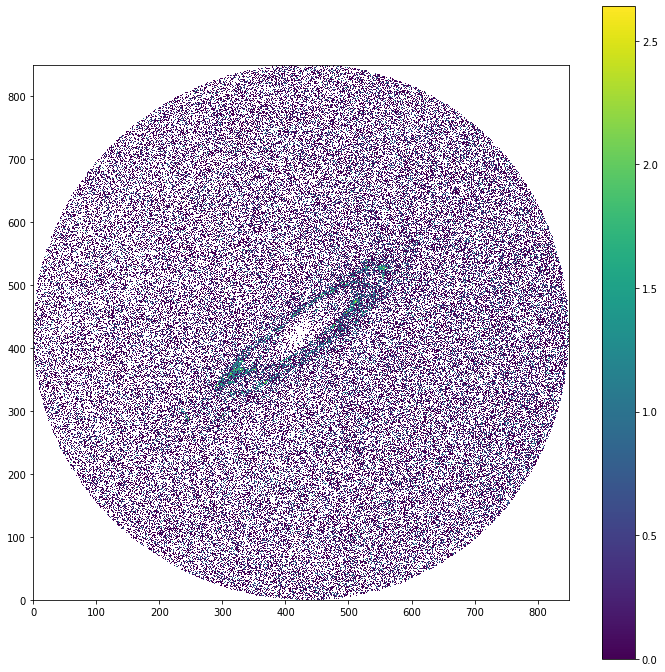

In [261]:
plt.figure(figsize=(12,12))
plt.imshow(np.log(h[0]), origin='lower')
plt.colorbar()

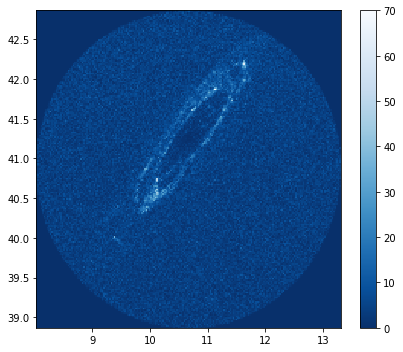

In [294]:
# How to launch query using gaiadr2 -- asynchronous search! 
job = Gaia.launch_job_async("select top 1000 * from gaiadr2.gaia_source order by source_id")
q1 = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


-4.7759340851709
20.102047674607906
19.22596279977244
-0.46855864263402947
-1.5922073291150058
-8.081723161708615
-16.297421650379626
-10.492354103767575
--
2.986190212989857
-6.278087886862299
